# Лабораторная работа 5.  Эвристические алгоритмы

## Задание 1

| Вариант | Лабиринт | 
|:---|:---|
|  8  | ![](./img/maze_05_08.png) |

### Волновой алгоритм

![](./img/WAVE_ALG.png)

### Маршрутный алгоритм

![](./img/MANCH_ALG.png)

## Задание 2

![](./img/maze10_08.png)

In [12]:
LABIRINTH = [
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1],
    [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1],
    [1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1],
    [1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1],
    [1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1],
    [1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1],
    [1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1],
    [1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1],
    [1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1],
    [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1],
    [1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1],
    [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1],
    [1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1],
    [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1],
    [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1],
    [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
    [1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
]

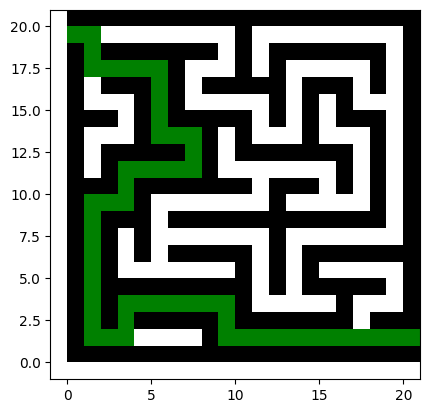

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from heapq import heappop, heappush

def manhattan_distance(p1, p2):
    return abs(p2[0] - p1[0]) + abs(p2[1] - p1[1])

def reconstruct_path(came_from, goal):
    current = goal
    path = [current]
    while current in came_from:
        current = came_from[current]
        path.append(current)
    return path[::-1]

def astar_search(lab, start, goal):
    rows, cols = len(lab), len(lab[0])
    open_set = [(0, start)]
    came_from = {}
    g_score = {start: 0}
    f_score = {start: manhattan_distance(start, goal)}

    while open_set:
        _, current = heappop(open_set)

        if current == goal:
            return reconstruct_path(came_from, goal)

        x, y = current
        neighbors = [(x-1, y), (x+1, y), (x, y-1), (x, y+1)]

        for neighbor in neighbors:
            nx, ny = neighbor
            if 0 <= nx < rows and 0 <= ny < cols and lab[nx][ny] == 0:
                tentative_g_score = g_score[current] + 1
                if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g_score
                    f_score[neighbor] = tentative_g_score + manhattan_distance(neighbor, goal)
                    heappush(open_set, (f_score[neighbor], neighbor))

    return None

# Задаем начальную и конечную точку
start = (1, 0)
goal = (19, 20)


path = astar_search(LABIRINTH, start, goal)

# Задаем ось
fig, ax = plt.subplots()
ax.set_aspect('equal', 'box')
ax.set_xlim(-1, len(LABIRINTH[0]))
ax.set_ylim(-1, len(LABIRINTH))

# Рисуем лабиринт
for i in range(len(LABIRINTH)):
    for j in range(len(LABIRINTH[i])):
        if LABIRINTH[i][j] == 1:
            rect = plt.Rectangle((j, len(LABIRINTH) - i - 1), 1, 1, facecolor='black')
            ax.add_artist(rect)

# Рисуем кратчайший путь
if path:
    for i in range(len(path)):
        rect = plt.Rectangle((path[i][1], len(LABIRINTH) - path[i][0] - 1), 1, 1, facecolor='green')
        ax.add_artist(rect)

plt.show()